In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [5]:
df = pd.read_csv("mcdonalds.csv")

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df.shape

(1453, 15)

#data preprocess

In [8]:
# Convert 'Like' column to numeric values
df['Like'] = df['Like'].str.extract(r'([-+]?\d+)').astype(float)

In [9]:
# Convert categorical columns to numeric
df.replace({"Yes": 1, "No": 0}, inplace=True)


In [11]:
# Convert 'VisitFrequency' to numerical values
visit_frequency_mapping = {"Once a month": 1, "Every three months": 3, "Once a week": 4}
df["VisitFrequency"] = df["VisitFrequency"].map(visit_frequency_mapping)


In [14]:
# Convert 'Gender' to numerical values
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})


In [ ]:
df['VisitFrequency'].fillna(0, inplace=True)

In [15]:
#lets see now oue datset looke lsike 

df.head(20)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,3.0,0
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,3.0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,3.0,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,4.0,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,1.0,1
5,1,1,0,1,0,1,1,1,0,0,0,2.0,55,3.0,1
6,1,1,1,1,0,1,0,1,1,1,0,2.0,56,3.0,0
7,1,1,0,1,1,1,1,1,0,0,0,5.0,23,4.0,0
8,0,0,0,1,1,0,0,0,1,0,1,-5.0,58,NaN,1
9,1,1,0,1,1,1,0,1,1,0,0,1.0,32,3.0,0


In [16]:
df['VisitFrequency'].fillna(0, inplace=True)

In [18]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,3.0,0
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,3.0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,3.0,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,4.0,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,1.0,1
5,1,1,0,1,0,1,1,1,0,0,0,2.0,55,3.0,1
6,1,1,1,1,0,1,0,1,1,1,0,2.0,56,3.0,0
7,1,1,0,1,1,1,1,1,0,0,0,5.0,23,4.0,0
8,0,0,0,1,1,0,0,0,1,0,1,-5.0,58,0.0,1
9,1,1,0,1,1,1,0,1,1,0,0,1.0,32,3.0,0


In [19]:
# customer Segmentation
# performing clustering using KMeans
X = df.drop(columns=['Like'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

c:\Users\poppo\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\poppo\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [21]:
#customer Behavior Analysis
# analyze purchase patterns, frequency, and preferences
# for simplicity, we use 'visitFrequency' and 'like' columns
df['Behavior_Score'] = df['VisitFrequency'] * df['Like']

In [30]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Segment,Behavior_Score,Segment_Demographic
0,0,1,0,1,0,1,1,0,1,0,0,-3.0,61,3.0,0,2,-9.0,1
1,1,1,0,1,1,1,1,1,1,0,0,2.0,51,3.0,0,1,6.0,0
2,0,1,1,1,1,1,0,1,1,1,0,1.0,62,3.0,0,1,3.0,0
3,1,1,0,1,1,1,1,1,0,0,1,4.0,69,4.0,0,1,16.0,0
4,0,1,0,1,1,1,1,0,0,1,0,2.0,49,1.0,1,2,2.0,0


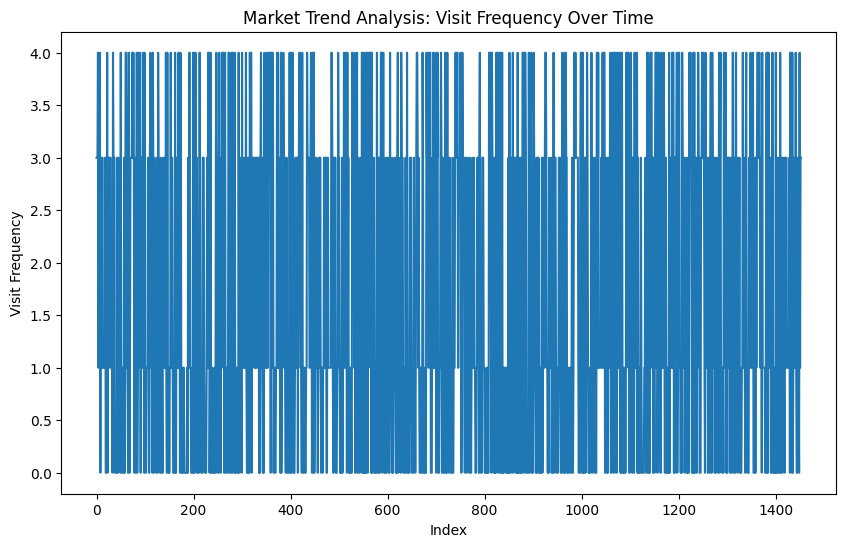

In [22]:
#market trend analysis:

# Market Trend Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y='VisitFrequency')
plt.title('Market Trend Analysis: Visit Frequency Over Time')
plt.xlabel('Index')
plt.ylabel('Visit Frequency')
plt.show()


c:\Users\poppo\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\poppo\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


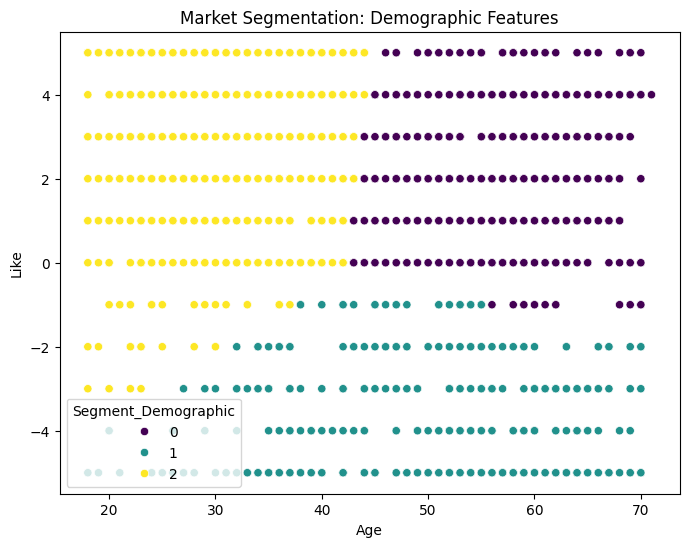

In [29]:
# market Segmentation
X_demographic = df[['Age', 'Like']] 
scaler = StandardScaler()
X_demographic_scaled = scaler.fit_transform(X_demographic)

kmeans_demographic = KMeans(n_clusters=3, random_state=42)
df['Segment_Demographic'] = kmeans_demographic.fit_predict(X_demographic_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Like', hue='Segment_Demographic', palette='viridis', legend='full')
plt.title('Market Segmentation: Demographic Features')
plt.xlabel('Age')
plt.ylabel('Like')
plt.show()


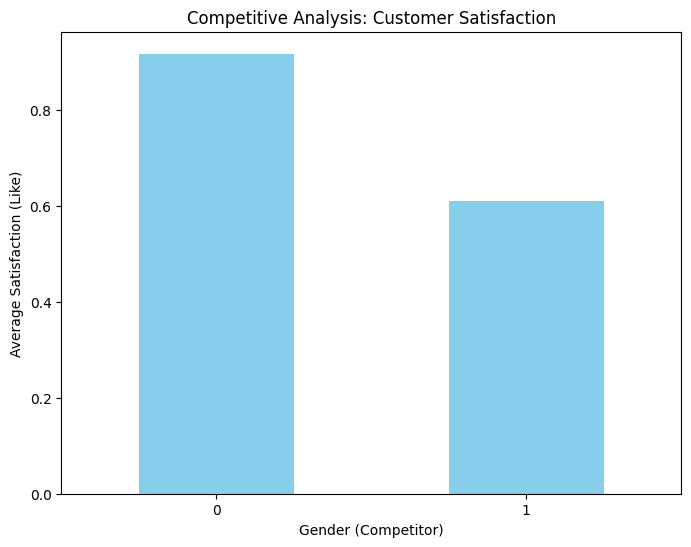

In [24]:
#compititive analysis

# Competitive Analysis
competitor_likes = df.groupby('Gender')['Like'].mean()

plt.figure(figsize=(8, 6))
competitor_likes.plot(kind='bar', color='skyblue')
plt.title('Competitive Analysis: Customer Satisfaction')
plt.xlabel('Gender (Competitor)')
plt.ylabel('Average Satisfaction (Like)')
plt.xticks(rotation=0)
plt.show()


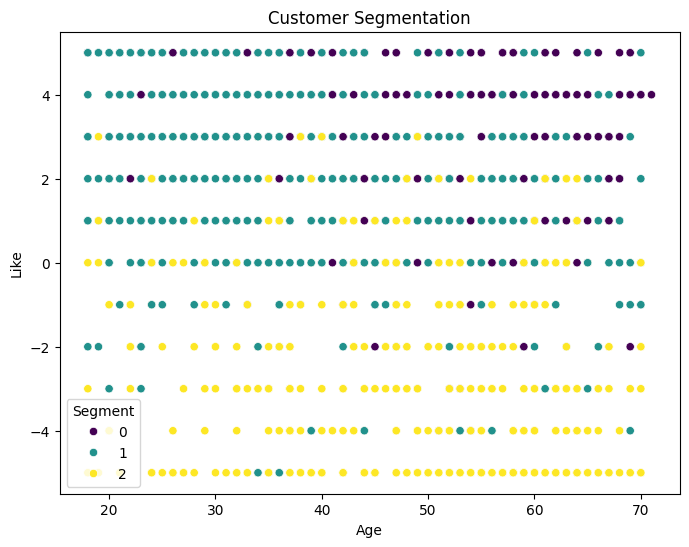

In [25]:
# Visualizations
# Scatter plot for Customer Segmentation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Like', hue='Segment', palette='viridis', legend='full')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Like')
plt.show()

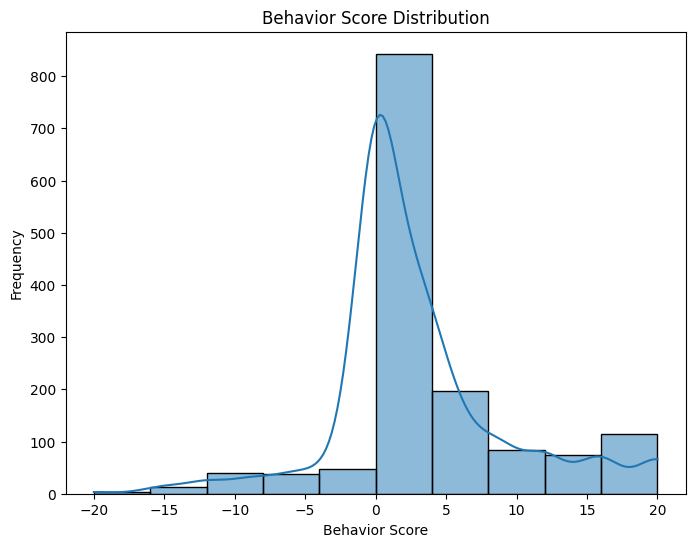

In [26]:
# Histogram for Behavior Score in Customer Behavior Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['Behavior_Score'], bins=10, kde=True)
plt.title('Behavior Score Distribution')
plt.xlabel('Behavior Score')
plt.ylabel('Frequency')
plt.show()